In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn/telecom_churn.csv


# **Telecom-churn**

**Cleansing**

In [2]:
df = pd.read_csv('../input/telecom-churn/telecom_churn.csv')

In [3]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [4]:
df.isnull().any()

Churn              False
AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

**Preproessing**

In [5]:
df.describe() #ดูภาพรวมของข้อมูลหาความผิดปกติ

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


เช็คจาก mean min max และ percentile จะเห็นว่าข้อมูลเบ้ขวามากๆ / ถ้าค่า std เป็น 0 แสดงว่าไม่มีความแปรปรวนเลย = ข้อมูลเหมือนกันหมด

In [6]:
y = df['Churn'].values 
X = df.drop(['Churn'],axis = 1).values

In [7]:
len(y)

3333

In [8]:
y.sum() #ค่าที่ label เป็น 0

483

In [9]:
len(y) - y.sum() #ค่าที่ label เป็น 0

2850

1 คือลูกค้าย้ายค่าย 0 คือลูกค้าอยู่บริการเดิม

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
X_train.shape

(2666, 10)

In [12]:
X_test.shape

(667, 10)

In [13]:
y_train.shape

(2666,)

In [14]:
y_test.shape

(667,)

In [15]:
y_train.sum() #label = 1

395

In [16]:
len(y_train) - y_train.sum() #label = 0

2271

# **Training**

**RandomForest**

In [17]:
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.ensemble import RandomForestClassifier #classifier
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

#from imblearn.under_sampling import RandomUnderSampler #imbalanced

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Imbalanced
#undersample = RandomUnderSampler(sampling_strategy='majority') 
#X_res, y_res = undersample.fit_resample(X_train, y_train)

#Pipeline
clf = Pipeline([ 
    ('scaler',MinMaxScaler(feature_range=(0,1))), #normalization
    ('feature_selection',SelectKBest(f_classif)), #select feature
    ('classification',RandomForestClassifier(random_state=0))#classifier
])


#Tune GridSearchCV
params = { 
    'feature_selection__k':[3,5,7],
    'classification__n_estimators': [10,20,50,100,200],
}
best_clf = GridSearchCV(clf, params, cv=10)

best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'classification__n_estimators': [10, 20, 50, 100, 200],
                         'feature_selection__k': [3, 5, 7]})

In [18]:
acc = best_clf.best_score_
print("10CV accuracy: "+str(acc))

10CV accuracy: 0.9227408408662103


In [19]:
best_clf.best_params_

{'classification__n_estimators': 200, 'feature_selection__k': 7}

In [20]:
yp = best_clf.predict(X_test)
acc = sum(yp == y_test)/len(y_test)
print("Test Training accuracy: "+str(acc))

Test Training accuracy: 0.9265367316341829


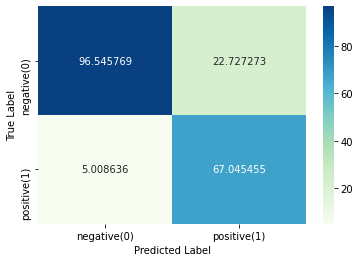

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative(0)', 'positive(1)']
C = confusion_matrix(y_test,yp) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yp,target_names=target_names)) 

              precision    recall  f1-score   support

 negative(0)       0.95      0.97      0.96       579
 positive(1)       0.75      0.67      0.71        88

    accuracy                           0.93       667
   macro avg       0.85      0.82      0.83       667
weighted avg       0.92      0.93      0.92       667



_________________________________________________________________________________

**SVC**

In [23]:
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.svm import SVC #classifier
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

#from imblearn.under_sampling import RandomUnderSampler #imbalanced

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Imbalanced
#undersample = RandomUnderSampler(sampling_strategy='majority') 
#X_res, y_res = undersample.fit_resample(X_train, y_train)

#Pipeline
clf = Pipeline([ 
    ('scaler',MinMaxScaler(feature_range=(0,1))), #normalization
    ('feature_selection',SelectKBest(f_classif)), #select feature
    ('classification',SVC(random_state=0))#classifier
])


#Tune GridSearchCV
params = { 
    'feature_selection__k':[3,5,7],
    'classification__C': [1,2,4,8,16,32],
    'classification__gamma' :[0.0625,0.0125,0.025,0.05,0.01,0,1,2,4,8,16,32]
}
best_clf = GridSearchCV(clf, params, cv=10)

best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        SVC(random_state=0))]),
             param_grid={'classification__C': [1, 2, 4, 8, 16, 32],
                         'classification__gamma': [0.0625, 0.0125, 0.025, 0.05,
                                                   0.01, 0, 1, 2, 4, 8, 16,
                                                   32],
                         'feature_selection__k': [3, 5, 7]})

In [24]:
acc = best_clf.best_score_
print("10CV accuracy: "+str(acc))

10CV accuracy: 0.9156106558531159


In [25]:
best_clf.best_params_

{'classification__C': 32,
 'classification__gamma': 4,
 'feature_selection__k': 7}

In [26]:
yp = best_clf.predict(X_test)
acc = sum(yp == y_test)/len(y_test)
print("Test Training accuracy: "+str(acc))

Test Training accuracy: 0.9220389805097451


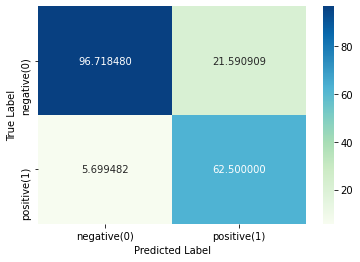

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative(0)', 'positive(1)']
C = confusion_matrix(y_test,yp) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yp,target_names=target_names)) 

              precision    recall  f1-score   support

 negative(0)       0.94      0.97      0.96       579
 positive(1)       0.74      0.62      0.68        88

    accuracy                           0.92       667
   macro avg       0.84      0.80      0.82       667
weighted avg       0.92      0.92      0.92       667



____________________________________________________________________________________

**ExtraTrees**

In [29]:
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.ensemble import ExtraTreesClassifier #classifier
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

#from imblearn.under_sampling import RandomUnderSampler #imbalanced

#Select feature
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import f_classif

#Imbalanced
#undersample = RandomUnderSampler(sampling_strategy='majority') 
#X_res, y_res = undersample.fit_resample(X_train, y_train)

#Pipeline
clf = Pipeline([ 
    ('scaler',MinMaxScaler(feature_range=(0,1))), #normalization
    #('feature_selection',SelectKBest(f_classif)), #select feature
    ('classification',ExtraTreesClassifier(random_state=0))#classifier
])


#Tune GridSearchCV
params = { 
    #'feature_selection__k':[3,5,7],
    'classification__n_estimators': [10,20,50,100,200]
}
best_clf = GridSearchCV(clf, params, cv=10)

best_clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('classification',
                                        ExtraTreesClassifier(random_state=0))]),
             param_grid={'classification__n_estimators': [10, 20, 50, 100,
                                                          200]})

In [30]:
acc = best_clf.best_score_
print("10CV accuracy: "+str(acc))

10CV accuracy: 0.9298555377207063


In [31]:
best_clf.best_params_

{'classification__n_estimators': 200}

In [32]:
yp = best_clf.predict(X_test)
acc = sum(yp == y_test)/len(y_test)
print("Test Training accuracy: "+str(acc))

Test Training accuracy: 0.9250374812593704


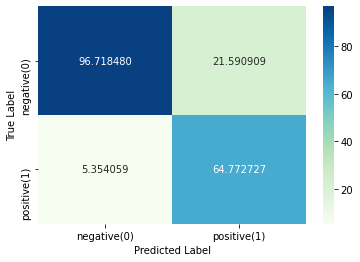

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative(0)', 'positive(1)']
C = confusion_matrix(y_test,yp) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yp,target_names=target_names)) 

              precision    recall  f1-score   support

 negative(0)       0.95      0.97      0.96       579
 positive(1)       0.75      0.65      0.70        88

    accuracy                           0.93       667
   macro avg       0.85      0.81      0.83       667
weighted avg       0.92      0.93      0.92       667



In [35]:
best_clf.best_estimator_.steps[1][1].feature_importances_

array([0.07042887, 0.07255904, 0.02574699, 0.05180713, 0.15808602,
       0.17833695, 0.07211594, 0.19021937, 0.09295035, 0.08774935])

___________________________________________________________________________________

# **ASSIGNMENT**

**Training**

In [36]:
from imblearn.over_sampling import SMOTE #imbalanced
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler #normalization
from sklearn.feature_selection import SelectKBest #select feature
from sklearn.feature_selection import f_classif #select feature
from sklearn.ensemble import RandomForestClassifier #classifier
from sklearn.model_selection import GridSearchCV 

#Imbalanced
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X_train, y_train)

#Pipeline
clf = Pipeline([ 
    ('scaler',MinMaxScaler(feature_range=(0,1))), #normalization
    ('feature_selection',SelectKBest(f_classif)), #select feature
    ('classification',RandomForestClassifier(random_state=0)) #classifier 
])

#Tune GridSearchCV
params = { 
    'feature_selection__k':[3,5,7,10],
    'classification__n_estimators': [10,100,1000],
    'classification__max_depth' : [1,2,3,4,5,6,7,8,8,9,10,11,12,13,14,15,16,17,18,19,20]
}
best_clf = GridSearchCV(clf, params, cv=10)

best_clf.fit(X_res, y_res)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('classification',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'classification__max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       8, 9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19, 20],
                         'classification__n_estimators': [10, 100, 1000],
                         'feature_selection__k': [3, 5, 7, 10]})

In [37]:
best_clf.best_params_

{'classification__max_depth': 18,
 'classification__n_estimators': 1000,
 'feature_selection__k': 10}

In [38]:
acc = best_clf.best_score_
print("10CV accuracy: "+str(acc))

10CV accuracy: 0.9454185022026431


**Testing**

In [39]:
yp = best_clf.predict(X_test)
acc = sum(yp == y_test)/len(y_test)
print("Test Training accuracy: "+str(acc))

Test Training accuracy: 0.9205397301349325


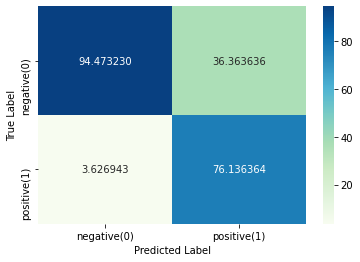

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['negative(0)', 'positive(1)']
C = confusion_matrix(y_test,yp) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yp,target_names=target_names)) 

              precision    recall  f1-score   support

 negative(0)       0.96      0.94      0.95       579
 positive(1)       0.68      0.76      0.72        88

    accuracy                           0.92       667
   macro avg       0.82      0.85      0.84       667
weighted avg       0.93      0.92      0.92       667



**Feature Selected**

In [42]:
f = best_clf.best_estimator_.steps[-1][1].feature_importances_

In [43]:
f_idx = np.argsort(-f)
f_idx

array([4, 1, 5, 7, 8, 3, 2, 9, 0, 6])

In [44]:
df.columns.values[f_idx]

array(['DataUsage', 'AccountWeeks', 'CustServCalls', 'DayCalls',
       'MonthlyCharge', 'DataPlan', 'ContractRenewal', 'OverageFee',
       'Churn', 'DayMins'], dtype=object)